In [1]:

init_lr = .001
lr_decay_factor = .9
lr_decay_epoch = 10


In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
epochs = np.arange(100)
epoch_lrs = init_lr * (lr_decay_factor**((epochs-1) // lr_decay_epoch))

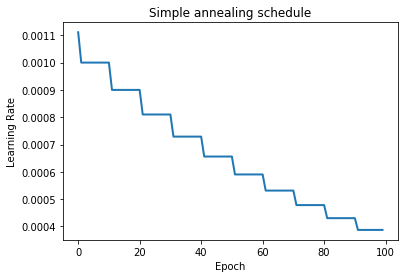

In [5]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Learning Rate')
ax1.set_title('Simple annealing schedule')
ax1.plot(epochs, epoch_lrs, lw=2)


In [6]:
warm_epochs = 5
epoch_lrs_w_warmup = init_lr * (lr_decay_factor**((epochs - 1 - warm_epochs) // lr_decay_epoch))

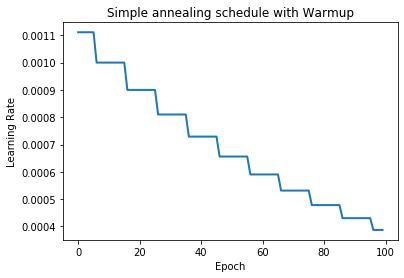

In [7]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Learning Rate')
ax1.set_title('Simple annealing schedule with Warmup')
ax1.plot(epochs, epoch_lrs_w_warmup, lw=2)


In [10]:

def warmup_scheduler(epoch, warm_lr=1e-4, warm_epochs=5, warmup_type='constant', target_lr=0.001):
  '''epoch: 1-based'''
  if warmup_type == 'constant':
    if epoch <= warm_epochs:
      return warm_lr
  elif warmup_type == 'linear':
    d_lr = (target_lr - warm_lr)/warm_epochs
    return warm_lr + (epoch-1) * d_lr # when epoch==warm_epochs+1, lr = target_lr


In [11]:

def cosine_anneal_schedule(t, init_lr, T, M):
  '''
  t: current epoch, if 1 based, need to be t-1
  init_lr: initial lr
  T: the total number of epochs
  M: number of snapshot models
  '''
  cos_inner = np.pi * (t % (T // M))  # t - 1 is used when t has 1-based indexing.
  cos_inner /= T // M
  cos_out = np.cos(cos_inner) + 1
  return float(init_lr / 2) * cos_out

In [16]:
cos_schedule_params = {'T': 100, 'M': 10, 'init_lr': 1e-4}

In [17]:
epochs_lr_cosine_schedule = cosine_anneal_schedule(epochs-1-warm_epochs, **cos_schedule_params)

### Frequency of cycle depends on number of "Model Snapshots" within a predetermined number of epochs

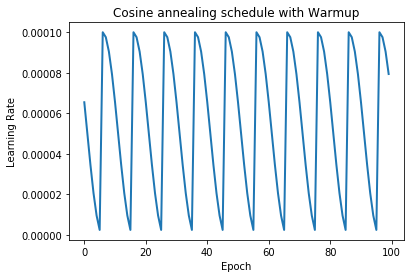

In [20]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Learning Rate')
ax1.set_title('Cosine annealing schedule with Warmup')
ax1.plot(epochs, epochs_lr_cosine_schedule, lw=2)
